# Exploratory Analysis

In [1]:
#import the required libraries

import sklearn
import time
import pandas as pd
import fastf1 as ff1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

## Extracting the Data from fastf1 (https://docs.fastf1.dev/index.html)

In [2]:
# Create empty dataframe
df_laps = pd.DataFrame()
df_weather = pd.DataFrame()

df = pd.DataFrame()

In [3]:
# Adjusts the log level to only display errors and critical messages
logging.getLogger('fastf1').setLevel(logging.ERROR)

# Call sessions
bahrain_2024 = ff1.get_session(2024, 'Bahrain', 'R')

# Load sessions
bahrain_2024.load()

In [4]:
# Call laps
bahrain_2024_laps = bahrain_2024.laps

# Add column called 'event_year'
bahrain_2024_laps['event_year'] = 'bahrain_2024'

In [5]:
pd.set_option('display.max_columns', None)

bahrain_2024_laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,event_year
0,0 days 01:01:37.489000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,0 days 00:00:23.616000,NaT,0 days 01:01:13.987000,0 days 01:01:37.669000,234.0,250.0,276.0,251.0,False,SOFT,4.0,False,Red Bull Racing,0 days 00:59:59.911000,2024-03-02 15:03:42.342,12,1.0,False,,False,False,bahrain_2024
1,0 days 01:03:13.785000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:41.661000,0 days 00:00:23.719000,0 days 01:02:08.426000,0 days 01:02:50.087000,0 days 01:03:13.806000,232.0,248.0,276.0,287.0,True,SOFT,5.0,False,Red Bull Racing,0 days 01:01:37.489000,2024-03-02 15:05:19.920,1,1.0,False,,False,True,bahrain_2024
2,0 days 01:04:50.538000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaT,NaT,0 days 00:00:30.999000,0 days 00:00:41.966000,0 days 00:00:23.788000,0 days 01:03:44.805000,0 days 01:04:26.771000,0 days 01:04:50.559000,231.0,243.0,276.0,290.0,False,SOFT,6.0,False,Red Bull Racing,0 days 01:03:13.785000,2024-03-02 15:06:56.216,1,1.0,False,,False,True,bahrain_2024
3,0 days 01:06:27.185000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:41.892000,0 days 00:00:23.824000,0 days 01:05:21.490000,0 days 01:06:03.382000,0 days 01:06:27.206000,233.0,253.0,276.0,NaN,False,SOFT,7.0,False,Red Bull Racing,0 days 01:04:50.538000,2024-03-02 15:08:32.969,1,1.0,False,,False,True,bahrain_2024
4,0 days 01:08:04.358000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.056000,0 days 00:00:23.862000,0 days 01:06:58.461000,0 days 01:07:40.517000,0 days 01:08:04.379000,231.0,245.0,276.0,289.0,False,SOFT,8.0,False,Red Bull Racing,0 days 01:06:27.185000,2024-03-02 15:10:09.616,1,1.0,False,,False,True,bahrain_2024


In [6]:
# Call weather data
bahrain_2024_laps_weather = bahrain_2024_laps.get_weather_data()
bahrain_2024_laps_weather.head()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
60,0 days 01:00:14.115000,18.2,49.0,1017.2,False,23.8,58,1.5
62,0 days 01:02:14.121000,18.3,49.0,1017.0,False,23.8,33,1.1
63,0 days 01:03:14.127000,18.3,49.0,1017.1,False,23.8,89,1.5
65,0 days 01:05:14.127000,18.3,49.0,1017.0,False,23.7,24,0.9
67,0 days 01:07:14.127000,18.3,50.0,1017.1,False,23.5,40,1.5


In [7]:
# Reset the indexes to ensure correct alignment
bahrain_2024_laps_ = bahrain_2024_laps.reset_index(drop=True)
bahrain_2024_weather_ = bahrain_2024_laps_weather.reset_index(drop=True)

# Exclude the 'Time' column from the weather DataFrame to avoid redundancy
bahrain_2024_weather_ = bahrain_2024_weather_.drop(columns=['Time'])

# Joining DataFrames
bahrain_2024_joined = pd.concat([bahrain_2024_laps_, bahrain_2024_weather_], axis=1)

bahrain_2024_joined

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,event_year,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 01:01:37.489000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,0 days 00:00:23.616000,NaT,0 days 01:01:13.987000,0 days 01:01:37.669000,234.0,250.0,276.0,251.0,False,SOFT,4.0,False,Red Bull Racing,0 days 00:59:59.911000,2024-03-02 15:03:42.342,12,1.0,False,,False,False,bahrain_2024,18.2,49.0,1017.2,False,23.8,58,1.5
1,0 days 01:03:13.785000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaT,NaT,0 days 00:00:30.916000,0 days 00:00:41.661000,0 days 00:00:23.719000,0 days 01:02:08.426000,0 days 01:02:50.087000,0 days 01:03:13.806000,232.0,248.0,276.0,287.0,True,SOFT,5.0,False,Red Bull Racing,0 days 01:01:37.489000,2024-03-02 15:05:19.920,1,1.0,False,,False,True,bahrain_2024,18.3,49.0,1017.0,False,23.8,33,1.1
2,0 days 01:04:50.538000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaT,NaT,0 days 00:00:30.999000,0 days 00:00:41.966000,0 days 00:00:23.788000,0 days 01:03:44.805000,0 days 01:04:26.771000,0 days 01:04:50.559000,231.0,243.0,276.0,290.0,False,SOFT,6.0,False,Red Bull Racing,0 days 01:03:13.785000,2024-03-02 15:06:56.216,1,1.0,False,,False,True,bahrain_2024,18.3,49.0,1017.1,False,23.8,89,1.5
3,0 days 01:06:27.185000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaT,NaT,0 days 00:00:30.931000,0 days 00:00:41.892000,0 days 00:00:23.824000,0 days 01:05:21.490000,0 days 01:06:03.382000,0 days 01:06:27.206000,233.0,253.0,276.0,NaN,False,SOFT,7.0,False,Red Bull Racing,0 days 01:04:50.538000,2024-03-02 15:08:32.969,1,1.0,False,,False,True,bahrain_2024,18.3,49.0,1017.0,False,23.7,24,0.9
4,0 days 01:08:04.358000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaT,NaT,0 days 00:00:31.255000,0 days 00:00:42.056000,0 days 00:00:23.862000,0 days 01:06:58.461000,0 days 01:07:40.517000,0 days 01:08:04.379000,231.0,245.0,276.0,289.0,False,SOFT,8.0,False,Red Bull Racing,0 days 01:06:27.185000,2024-03-02 15:10:09.616,1,1.0,False,,False,True,bahrain_2024,18.3,50.0,1017.1,False,23.5,40,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0 days 02:25:37.835000,SAR,2,0 days 00:01:35.972000,51.0,4.0,NaT,NaT,0 days 00:00:30.781000,0 days 00:00:41.539000,0 days 00:00:23.652000,0 days 02:24:32.668000,0 days 02:25:14.207000,0 days 02:25:37.859000,233.0,261.0,281.0,291.0,False,SOFT,11.0,True,Williams,0 days 02:24:01.863000,2024-03-02 16:27:44.294,1,20.0,False,,False,True,bahrain_2024,17.6,51.0,1017.5,False,21.9,0,0.4
1125,0 days 02:27:13.822000,SAR,2,0 days 00:01:35.987000,52.0,4.0,NaT,NaT,0 days 00:00:30.775000,0 days 00:00:41.440000,0 days 00:00:23.772000,0 days 02:26:08.634000,0 days 02:26:50.074000,0 days 02:27:13.846000,NaN,262.0,281.0,292.0,False,SOFT,12.0,True,Williams,0 days 02:25:37.835000,2024-03-02 16:29:20.266,1,20.0,False,,False,True,bahrain_2024,17.6,51.0,1017.5,False,21.9,330,0.0
1126,0 days 02:28:49.910000,SAR,2,0 days 00:01:36.088000,53.0,4.0,NaT,NaT,0 days 00:00:30.798000,0 days 00:00:41.610000,0 days 00:00:23.680000,0 days 02:27:44.644000,0 days 02:28:26.254000,0 days 02:28:49.934000,232.0,261.0,281.0,NaN,False,SOFT,13.0,True,Williams,0 days 02:27:13.822000,2024-03-02 16:30:56.253,1,20.0,False,,False,True,bahrain_2024,17.6,51.0,1017.5,False,21.9,213,0.3
1127,0 days 02:30:29.524000,SAR,2,0 days 00:01:39.614000,54.0,4.0,NaT,NaT,0 days 00:00:32.179000,0 days 00:00:43.748000,0 days 00:00:23.687000,0 days 02:29:22.113000,0 days 02:30:05.861000,0 days 02:30:29.548000,185.0,261.0,282.0,NaN,False,SOFT,14.0,True,Williams,0 days 02:28:49.910000,2024-03-02 16:32:32.341,1,20.0,False,,False,True,bahrain_2024,17.6,51.0,1017.

In [8]:
# # 1. Criar a coluna 'LapTime_seconds' convertendo 'LapTime' para segundos
# bahrain_2024_joined['LapTime_seconds'] = bahrain_2024_joined['LapTime'].dt.total_seconds()

# # 2. Criar a coluna 'delta_lap' com a diferença de tempo entre voltas consecutivas por piloto
# # Inicializar a coluna 'delta_lap' com 0
# bahrain_2024_joined['delta_lap'] = 0.0

# # # Ordenar o dataframe por piloto e número da volta (para garantir a ordem correta)
# # bahrain_2024_joined = bahrain_2024_joined.sort_values(by=['Driver', 'LapNumber'])

# # Calcular o delta_lap para cada piloto
# for driver in bahrain_2024_joined['Driver'].unique():
#     # Filtrar os dados do piloto atual
#     driver_data = bahrain_2024_joined[bahrain_2024_joined['Driver'] == driver]
    
#     # Calcular a diferença entre voltas consecutivas
#     delta_lap = driver_data['LapTime_seconds'].diff().fillna(0)
    
#     # Atribuir os valores calculados à coluna 'delta_lap'
#     bahrain_2024_joined.loc[driver_data.index, 'delta_lap'] = delta_lap

# bahrain_2024_joined[['Driver', 'LapNumber', 'LapTime', 'LapTime_seconds', 'delta_lap']].head(10)

In [9]:
data = bahrain_2024_joined

# Missing Data Analysis
print("Missing data per column:")
print(data.isnull().sum())

Missing data per column:
Time                     0
Driver                   0
DriverNumber             0
LapTime                  2
LapNumber                0
Stint                    0
PitOutTime            1086
PitInTime             1086
Sector1Time             21
Sector2Time              0
Sector3Time              0
Sector1SessionTime      22
Sector2SessionTime       0
Sector3SessionTime       0
SpeedI1                300
SpeedI2                  0
SpeedFL                 43
SpeedST                170
IsPersonalBest           0
Compound                 0
TyreLife                 0
FreshTyre                0
Team                     0
LapStartTime             0
LapStartDate             0
TrackStatus              0
Position                 0
Deleted                  0
DeletedReason            0
FastF1Generated          0
IsAccurate               0
event_year               0
AirTemp                  0
Humidity                 0
Pressure                 0
Rainfall                 0
Tra

In [10]:
# Handle missing data
# Fill null values in numeric columns with the median
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Remove columns with too many null values
data = data.dropna(axis=1, thresh=0.7 * len(data))

# print("Missing data per column:")
# print(data.isnull().sum())

### Distribution analysis

In [11]:
print(data[['Sector1Time', 'Sector2Time', 'Sector3Time', 'LapTime']].dtypes)

Sector1Time    timedelta64[ns]
Sector2Time    timedelta64[ns]
Sector3Time    timedelta64[ns]
LapTime        timedelta64[ns]
dtype: object


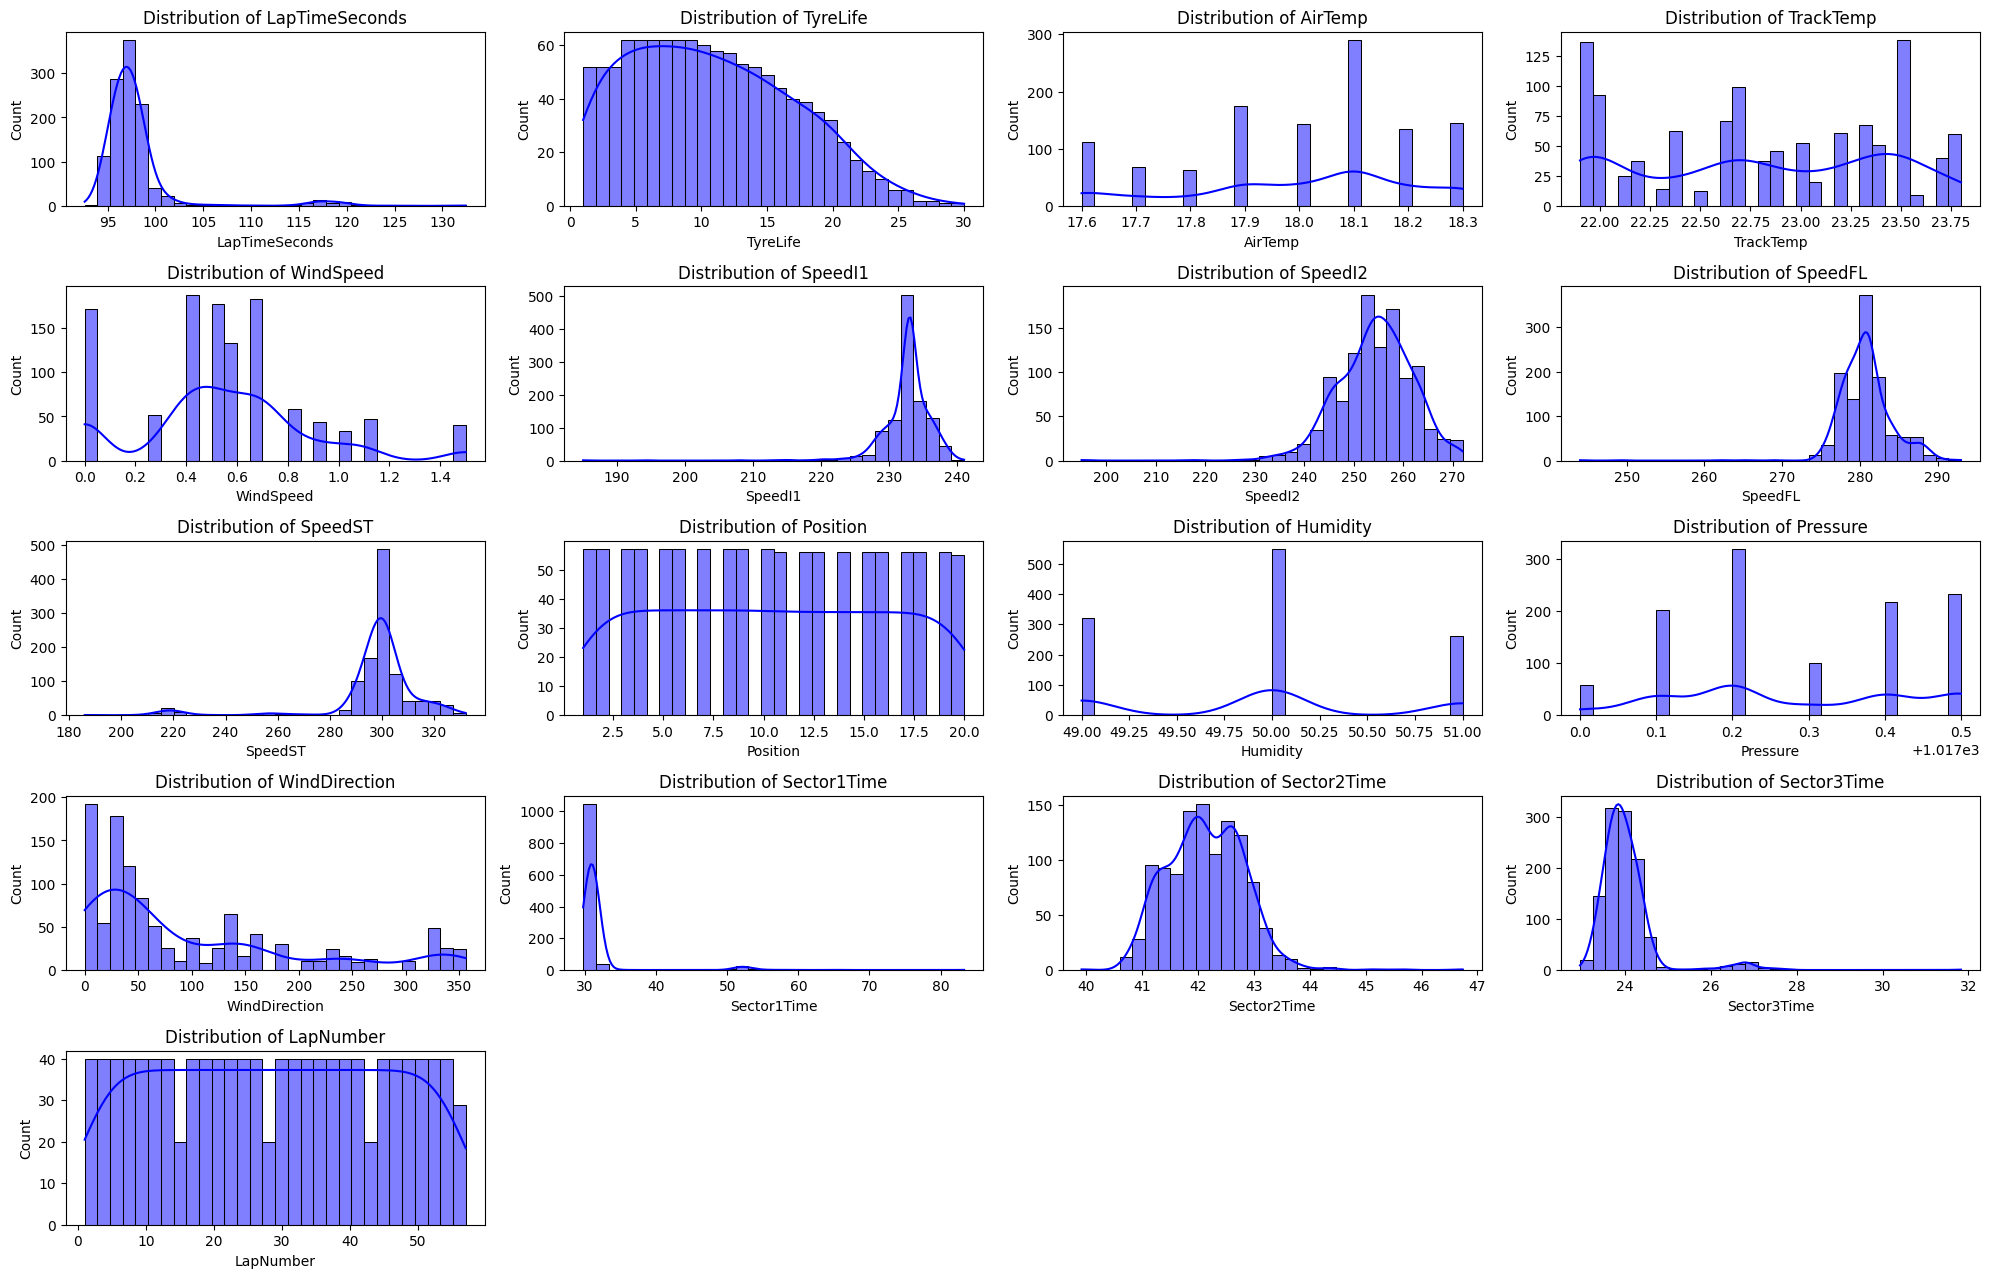

In [12]:
numerical_features = [
    'LapTimeSeconds',     # Lap time in seconds
    'TyreLife',           # Tyre life
    'AirTemp',            # Air temperature
    'TrackTemp',          # Track temperature
    'WindSpeed',          # Wind speed
    'SpeedI1',            # Speed in the first sector
    'SpeedI2',            # Speed in the second sector
    'SpeedFL',            # Speed on the main straight
    'SpeedST',            # Speed in the timing sector
    'Position',           # Position in the race
    'Humidity',           # Relative humidity of the air
    'Pressure',           # Atmospheric pressure
    'WindDirection',      # Wind direction
    'Sector1Time',        # Time in sector 1
    'Sector2Time',        # Time in sector 2
    'Sector3Time',        # Time in sector 3
    'LapNumber'
    #'delta_lap'           # time difference between two consecutives laps
]

# Convert lap time to seconds
data['Sector1Time'] = data['Sector1Time'].dt.total_seconds()
data['Sector2Time'] = data['Sector2Time'].dt.total_seconds()
data['Sector3Time'] = data['Sector3Time'].dt.total_seconds()
data['LapTimeSeconds'] = data['LapTime'].dt.total_seconds()

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(6, 4, i)
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipykernel_85649/3587655893.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette='viridis')
/tmp/ipykernel_85649/3587655893.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette='viridis')
/tmp/ipykernel_85649/3587655893.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette='viridis')
/tmp/ipykernel_85649/3587655893.py:12: FutureWarning: 

Passi

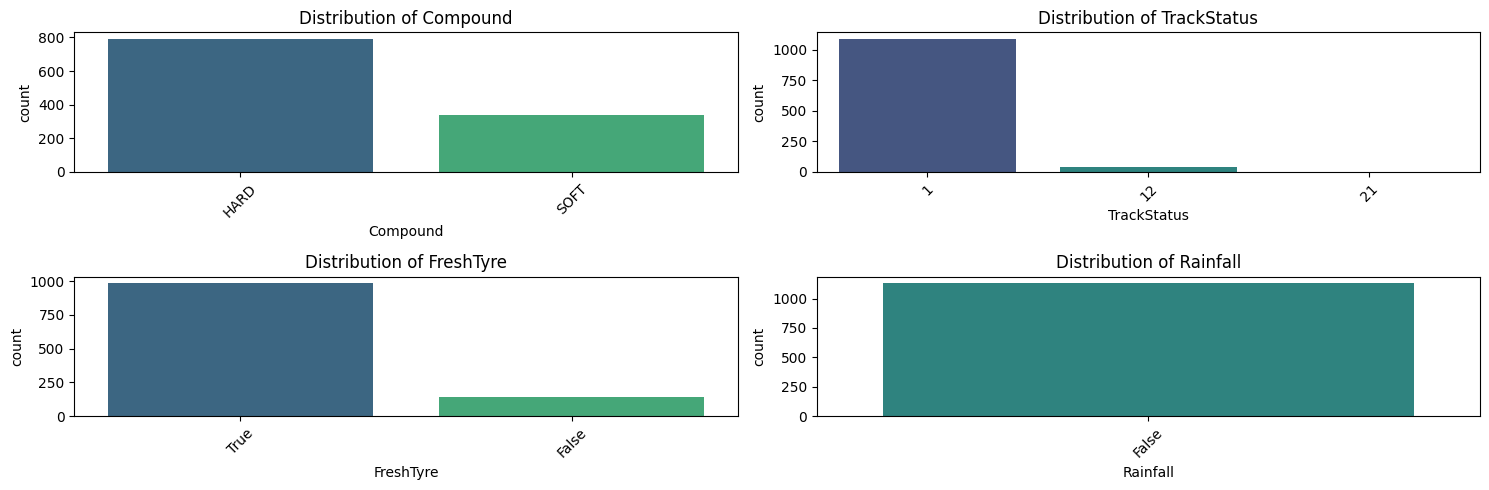

In [13]:
# Distribution of categorical variables
categorical_features = [
    'Compound',    # Tire type (SOFT, MEDIUM, HARD)
    'TrackStatus', # Track status (green flag, yellow flag, etc.)
    'FreshTyre',   # True or false
    'Rainfall'     # True or false
]

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
bahrain_2024_joined['TrackStatus'].value_counts()

TrackStatus
1     1087
12      40
21       2
Name: count, dtype: int64

### Correlation analysis

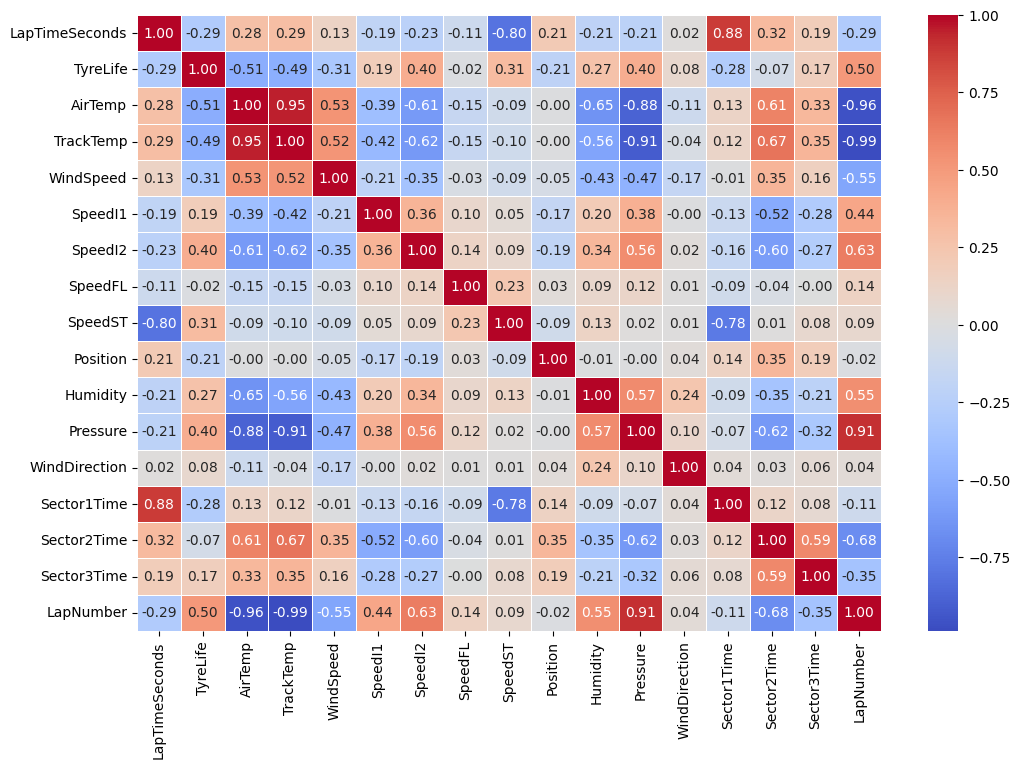

In [15]:
# Correlation matrix using Pearson's correlation coefficient
correlation_matrix = data[numerical_features].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [16]:
# Feature selection
# Identify features most correlated with lap time (LapTimeSeconds)
correlation_with_target = correlation_matrix['LapTimeSeconds'].sort_values(ascending=False)
print("Correlation of features with lap time (LapTimeSeconds):")
print(correlation_with_target)

Correlation of features with lap time (LapTimeSeconds):
LapTimeSeconds    1.000000
Sector1Time       0.880481
Sector2Time       0.321950
TrackTemp         0.294680
AirTemp           0.278260
Position          0.212577
Sector3Time       0.192408
WindSpeed         0.133004
WindDirection     0.018235
SpeedFL          -0.111733
SpeedI1          -0.190373
Humidity         -0.206334
Pressure         -0.213846
SpeedI2          -0.225022
LapNumber        -0.287440
TyreLife         -0.288573
SpeedST          -0.803459
Name: LapTimeSeconds, dtype: float64


In [17]:
# Select the top 5 most correlated features
top_features = correlation_with_target.index[1:6]
print("\nTop 5 features most correlated with lap time:")
print(top_features)


Top 5 features most correlated with lap time:
Index(['Sector1Time', 'Sector2Time', 'TrackTemp', 'AirTemp', 'Position'], dtype='object')


### Others analysis

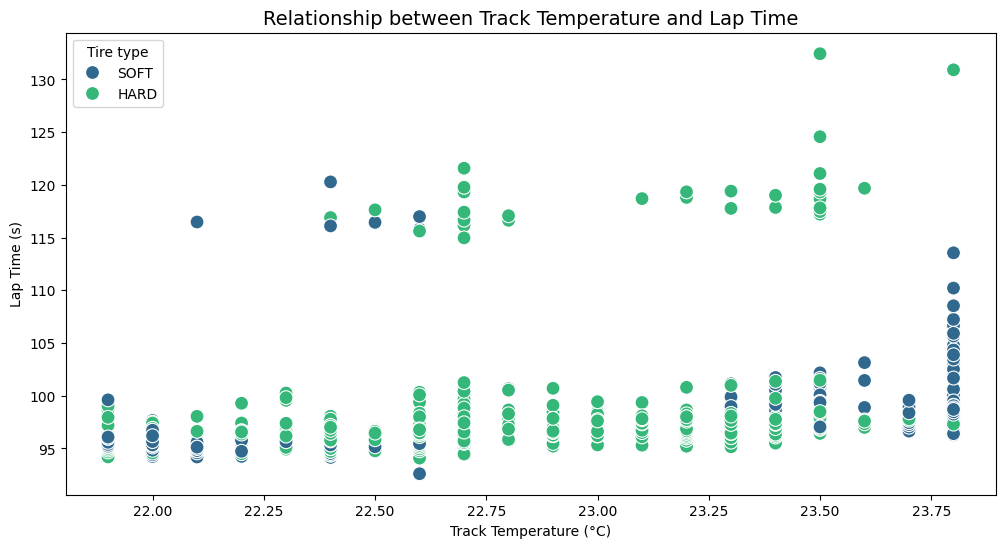

In [18]:
# Relationship between lap time and track temperature
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='TrackTemp', y='LapTimeSeconds', hue='Compound', palette='viridis', s=100)
plt.title('Relationship between Track Temperature and Lap Time', fontsize=14)
plt.xlabel('Track Temperature (°C)')
plt.ylabel('Lap Time (s)')
plt.legend(title='Tire type')
plt.show()

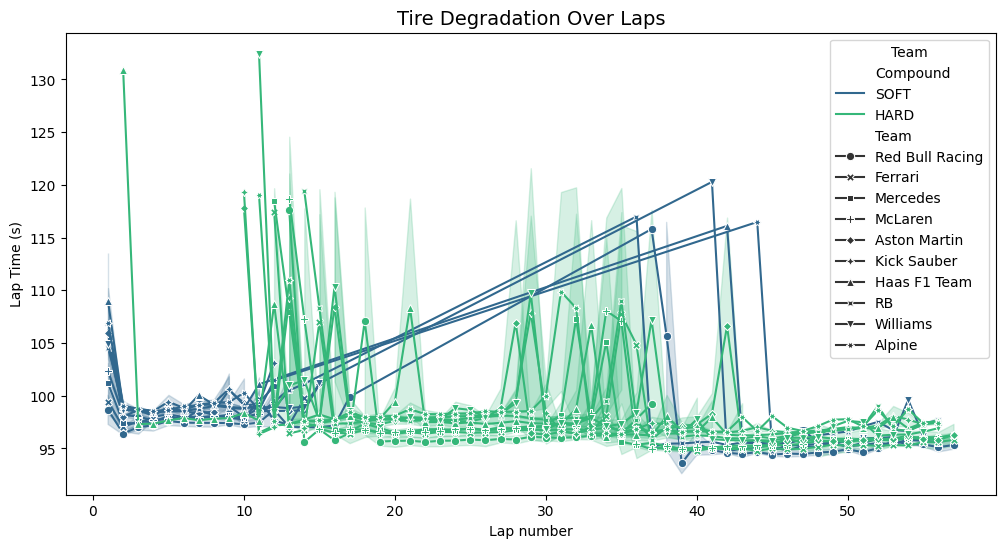

In [19]:
# Tire degradation over laps
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='LapNumber', y='LapTimeSeconds', hue='Compound', style='Team', markers=True, dashes=False, palette='viridis')
plt.title('Tire Degradation Over Laps', fontsize=14)
plt.xlabel('Lap number')
plt.ylabel('Lap Time (s)')
plt.legend(title='Team')
plt.show()